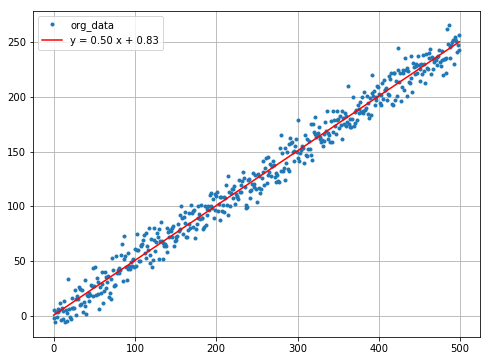

In [1]:
# Least Squares Linear Regression by using sklearn.linear_model.LinearRegression()
# Link to LinearRegression() --> 
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# Author: YCHEN, Jul 05, 2017, NYU
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import linear_model
%matplotlib inline

N = 500
array_x = np.array(range(N))
linear_y = 0.5*array_x + 1.0 
noice_y = 10*np.array(np.random.randn(N))
array_y = linear_y + noice_y

# Use linear_model.LinearRegression() to fit the data array_x, array_y
reg = linear_model.LinearRegression()
reg.fit(array_x.reshape(-1, 1), array_y.reshape(-1, 1))

dash_x = np.linspace(array_x.min(), array_x.max(), 1000).reshape(-1, 1)
dash_y = reg.coef_*dash_x + reg.intercept_

plt.figure(figsize = (8, 6))
plt.grid(True)

org_data, = plt.plot(array_x, array_y, '.', label= 'org_data')
fit_model, = plt.plot(dash_x, dash_y, color='r', label = 'y = %.2f x + %.2f'%(reg.coef_, reg.intercept_))
plt.legend(handles = [org_data, fit_model])
plt.savefig("xy_plot.png", dpi = 96)

In [2]:
# Calculate attributes of a data set 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import linear_model
%matplotlib inline


N = 1000
array_x = np.array(range(N))
linear_y = 0.5*array_x + 1.0 
noice_y = 10*np.array(np.random.randn(N))
array_y = linear_y + noice_y

# mean
print('mean = %.2f'%array_x.mean())
# standard deviation
print('std = %.2f'%array_y.std()) 


mean = 499.50
std = 145.15


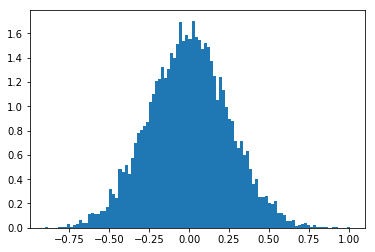

In [4]:
# Generate random number with normal distribution
# random number generator
noise = np.random.normal(loc=0.0, scale = 0.25, size = 10000)
plt.hist(noise, bins=100, normed=True)
plt.show()

# More with Linear Regression: Gradient Decent

$ f(x) = x^4 - 3x^3 + 2 $

In [ ]:
# Demo of gradient decent 
# plot out f(x) in a range of [-2.5, 3]

import  numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 3*x**3 + 2

def df(x):
    return 4*x**3 - 9*x**2

def grad_decent(x):
    return x - learning_rate*df(x)

x = np.linspace(-2, 3.5, 101)
x_init = 3
learning_rate = 0.01

N = 100
x_record = np.zeros(N)
x_record[0] = x_init

for i in range(N-1):
    x_record[i+1] = grad_decent(x_record[i])

fig = plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
fig_fx, = plt.plot(x, f(x), label='$f(x) = x^4 - 3^3 + 2$')
plt.plot(x_record, f(x_record), 'ro')
plt.legend(handles=[fig_fx], fontsize=14)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
fig_df, = plt.plot(x, df(x), label='$df/dx(x) = 4 x^3 - 9 x^3$', color=[1, 0, 1], linestyle='--')
plt.plot(x_record, df(x_record), marker='o')
plt.legend(handles=[fig_df], fontsize=14)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('df/dx')
plt.show()

print('root = %.2f'%x_record[N-1])

In [5]:
# From calculation, it is expected that the local minimum occurs at x=9/4

cur_x = 6 # The algorithm starts at x=6
gamma = 0.01 # step size multiplier
precision = 1.0e-6
previous_step_size = cur_x

def df(x):
    return 4*x**3 - 9*x**2

while previous_step_size > precision:
    prev_x = cur_x
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)

print("The local minimum occurs at %f" % cur_x)

The local minimum occurs at 2.249996


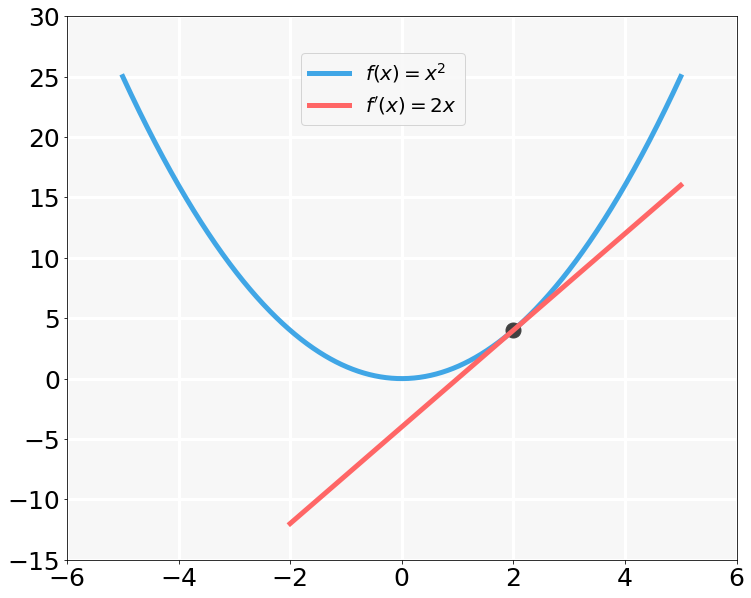

In [9]:
from matplotlib import rc
# f(x) = x**2
def f(x):
    return x**2
def df(x):
    return 2*x

x = np.linspace(-5.0, 5.0, 1001)
y = x**2
x_init = 2
y_init = f(x_init)
dx = np.linspace(-2, 5, 701)
tang_line = df(x_init)*dx - 4

fig = plt.figure(figsize=(12, 10), frameon=True)
plt.grid(True, color='w', linewidth=3)
plt.rcParams['axes.facecolor'] = [0.97, 0.97, 0.97]
fx, = plt.plot(x, y, linewidth=5, color=[0.25, 0.65, 0.9], label='$f(x) = x^2$')
x_dot = plt.plot(x_init, y_init, color=[0.25, 0.25, 0.25], marker='.', markersize=30)
df, = plt.plot(dx, tang_line,  color=[1.0, 0.4, 0.4], linestyle='-', linewidth=5, label='$f\'(x) = 2x$')
rc('xtick', labelsize=25) 
rc('ytick', labelsize=25)
plt.legend(handles = [fx, df], fontsize=20, loc=[0.35, 0.8])
plt.xlim([-6, 6.0])
plt.ylim([-15, 30])
plt.show()
fig.savefig('fx-x.png', dpi=96)

In [13]:
# method for gradient decent using sigmoid as the activation function
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consilated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(x, w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error * sigmoid_prime(h)
# Note: The sigmoid_prime function calculates sigmoid(h) twice,
#       but you've already calculated it once. You can make this
#       code more efficient by calculating the derivative directly
#       rather than calling sigmoid_prime, like this:
# error_term = error * nn_output * (1 - nn_output)

# TODO: Calculate change in weights
del_w = learnrate * error_term * x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.689974481128
Amount of Error:
-0.189974481128
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
5        1  760  3.00     2
6        1  560  2.98     1
7        0  400  3.08     2
8        1  540  3.39     3
9        0  700  3.92     2
10       0  800  4.00     4
11       0  440  3.22     1
12       1  760  4.00     1
13       0  700  3.08     2
14       1  700  4.00     1
15       0  480  3.44     3
16       0  780  3.87     4
17       0  360  2.56     3
18       0  800  3.75     2
19       1  540  3.81     1
20       0  500  3.17     3
21       1  660  3.63     2
22       0  600  2.82     4
23       0  680  3.19     4
24       1  760  3.35     2
25       1  800  3.66     1
26       1  620  3.61     1
27       1  520  3.74     4
28       1  780  3.22     2
29       0  520  3.29     1
..     ...  ...   ...   ...
370      1  540  3.77     2
371      1  680  3.76     3
372      1  680  2.42     1
373      1  620  3.3

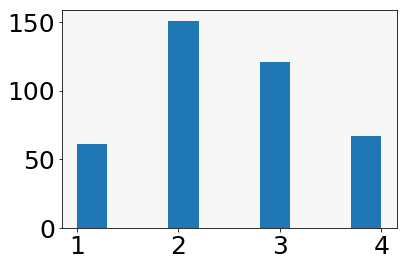

In [43]:
# data_prep.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

f = pd.read_csv('binary.csv')
print(f)
# classify data sets by rank 1-4 first 
rank = f['rank']
plt.hist(rank)
plt.show()

In [6]:
# application of mask to manipulate numpy arrays 
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(9).reshape(3, 3)
y = (x < 5)
z = x[y]
print(z)

[0 1 2 3 4]
